# 04.CNN(합성곱 신경망, Convolutional Neural Network)

> - 이미지나 비디오 인식, 분류 작업에 주로 사용되는 딥러닝 모델
> - 여러층의 합성곱과 풀링연산을 통해 이미지에 중요한 특징을 추출해서 예측

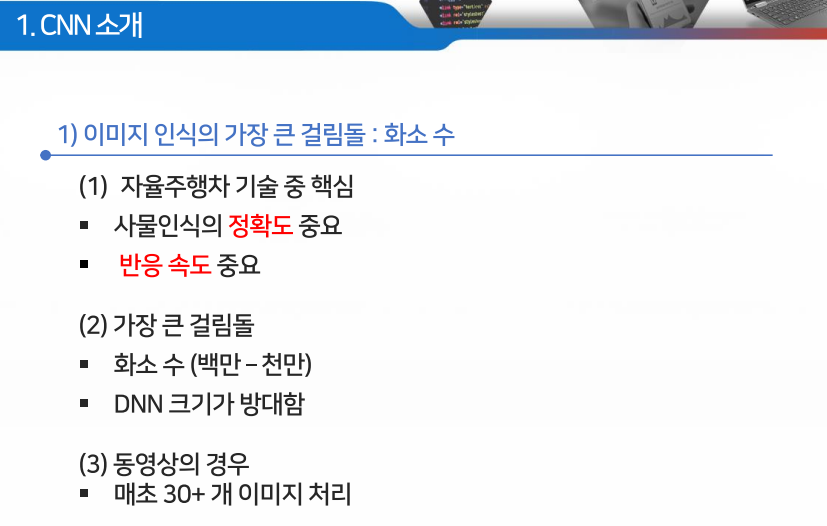

In [1]:
from IPython.display import Image
Image("img/day02_01.png", width=600)

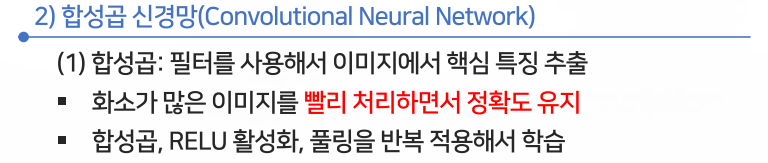

In [2]:
Image("img/day02_02.png", width=600)

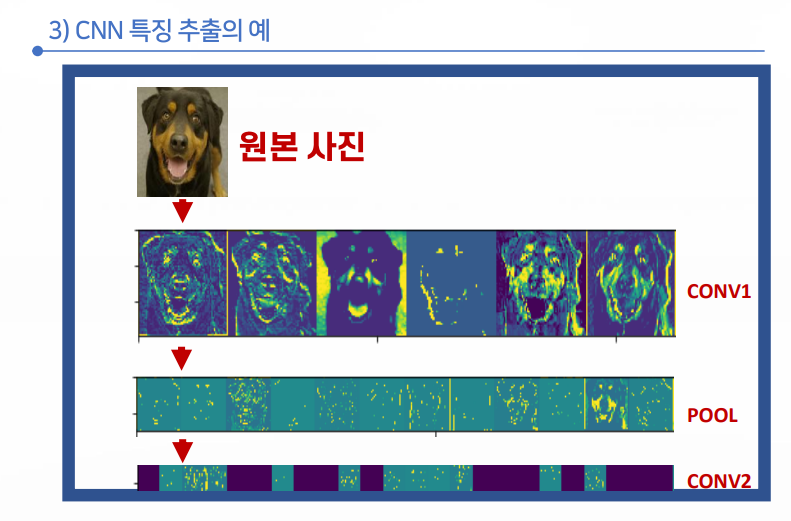

In [3]:
Image("img/day02_03.png", width=600)

### 1. 합성곱 층(conv)

> - 필터(커널)을 사용하여 입력 이미지에 대한 합성곱 연산을 수행
> - 필터는 이미지의 작은 부분을 스캔하여 특정 패턴을 감지
> - 여러개의 필터를 사용하여 다양한 특징 맵을 생성

### 2. 활성화 함수
> - 주로 Relu 함수를 사용한다.

### 3. 풀링
> - 특정 맵의 공간 크기를 줄여 계산량을 줄이고, 중요한 정보만 추출
> - 최대 풀ㄹ링, 평균 풀링을 사용

### 4. 완전연결
> - 추출된 특징을 기반으로 최종 클래스를 예측하는 역할을 한다.

#### 입력이미지 -> 합성곱 층 -> 활성화 함수 -> 풀링 층 -> 합성곱 층 -> 풀링 층 -> 완전 연결 -> 출력

### 1. 합성곱 

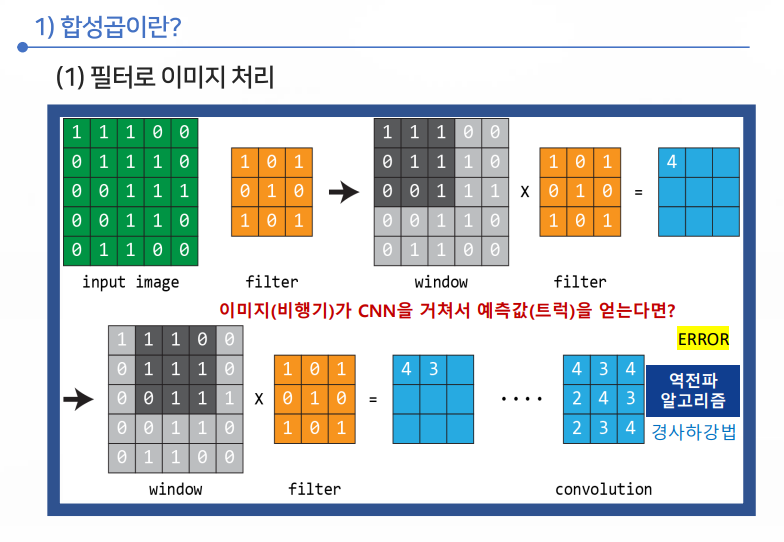

In [4]:
Image("img/day02_04.png", width=600)

In [5]:
import numpy as np
# 행렬 정의
A = np.array([
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]
])

B = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

# 요소별 곱셈
elementwise_product = A * B

# 곱한 결과 합산
result = np.sum(elementwise_product)

# 결과 출력
print(result)

4


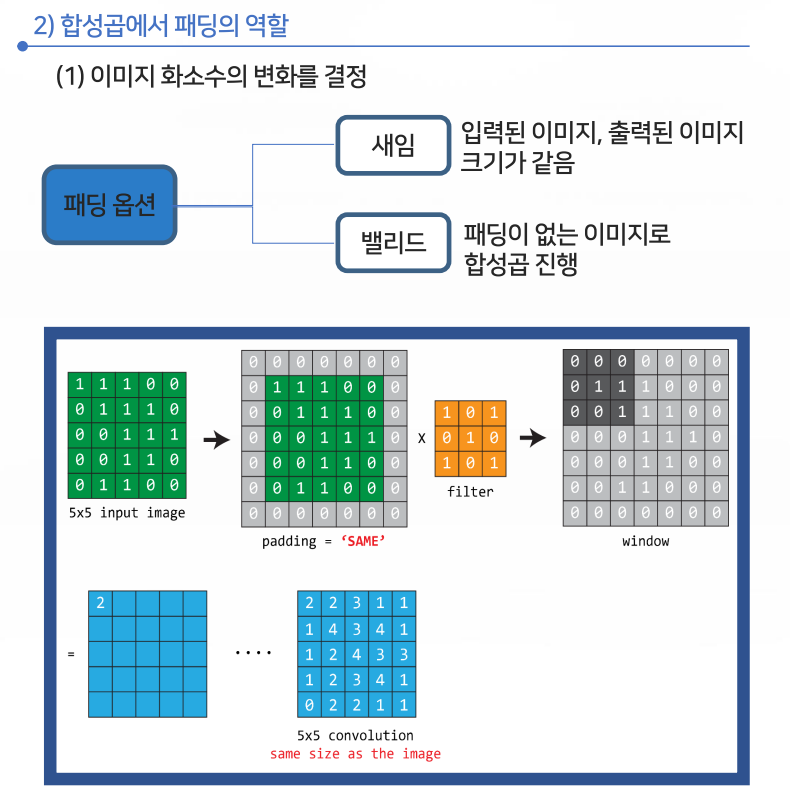

In [6]:
Image("img/day02_05.png", width=600)

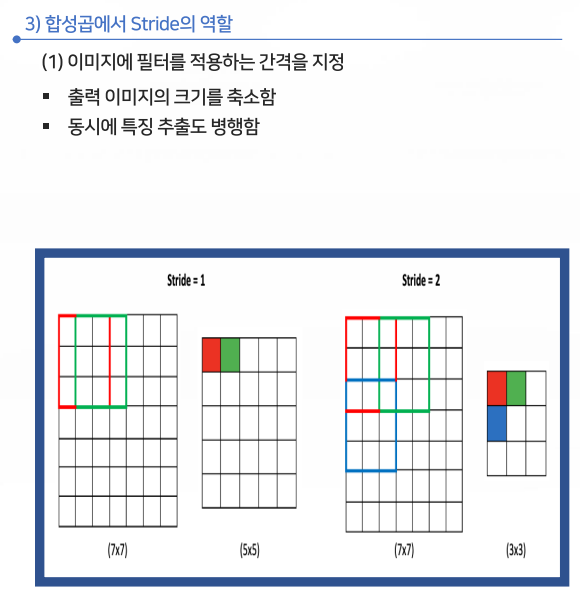

In [7]:
Image("img/day02_06.png", width=600)

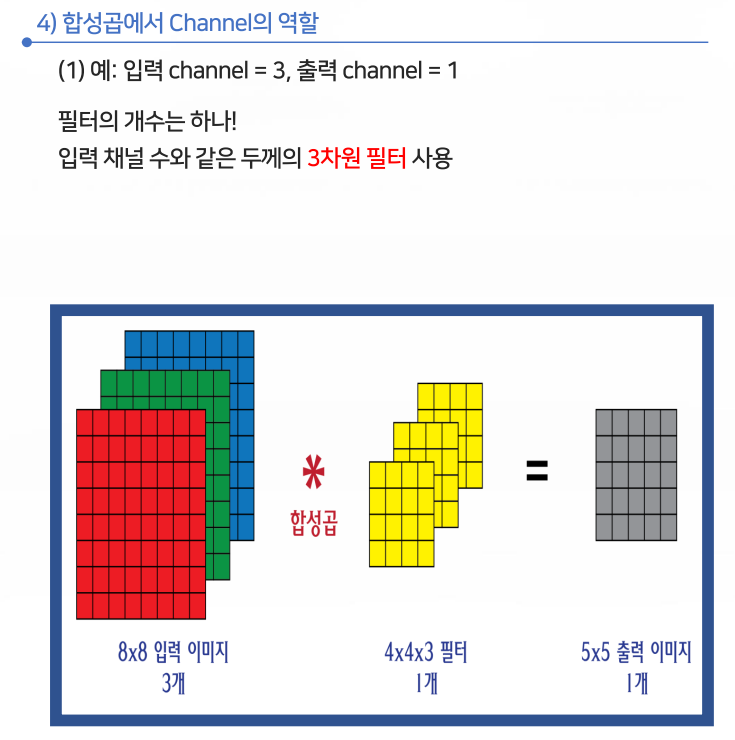

In [8]:
Image("img/day02_07.png", width=600)

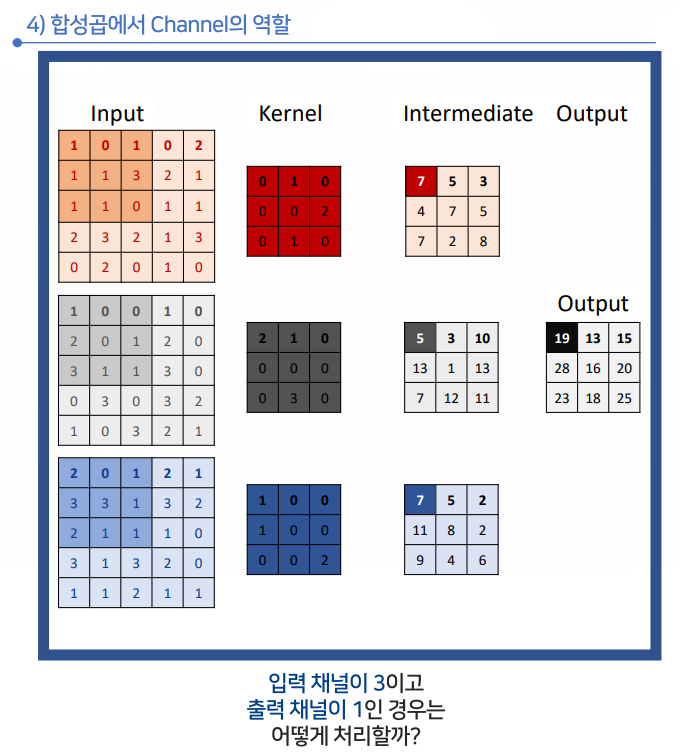

In [9]:
Image("img/day02_08.png", width=600)

# LeNet-5 아키텍처

LeNet-5는 Yann LeCun과 그의 동료들이 개발한 초기의 합성곱 신경망(CNN) 아키텍처로, 주로 손글씨 숫자 인식(MNIST 데이터셋) 작업에 사용됩니다. LeNet-5는 여러 개의 합성곱 층과 서브샘플링(또는 풀링) 층으로 구성되어 있습니다. 아래는 LeNet-5의 각 단계를 설명하는 것입니다.

## LeNet-5 아키텍처 단계별 설명

1. **입력층 (Input Layer)**
   - **크기:** 32x32 픽셀의 이미지.
   - **설명:** 네트워크의 입력으로, 원본 이미지를 네트워크에 공급합니다. MNIST 이미지의 원래 크기는 28x28이지만, LeNet-5는 32x32 이미지를 사용합니다. 이를 위해 MNIST 이미지는 32x32로 패딩됩니다.

2. **첫 번째 합성곱 층 (C1: Convolutional Layer)**
   - **필터 수:** 6개.
   - **필터 크기:** 5x5.
   - **출력 크기:** 28x28 (6개의 28x28 특성 맵).
   - **설명:** 입력 이미지에 6개의 5x5 필터를 적용하여 6개의 특성 맵을 생성합니다. 출력 크기는 \(32 - 5 + 1 = 28\)이 됩니다. 이 층은 이미지에서 저수준 특징(에지, 코너 등)을 추출합니다.

3. **첫 번째 서브샘플링 층 (S2: Subsampling Layer)**
   - **풀링 크기:** 2x2.
   - **풀링 방식:** 평균 풀링 (Average Pooling).
   - **출력 크기:** 14x14 (6개의 14x14 특성 맵).
   - **설명:** 각 28x28 특성 맵에 대해 2x2 영역의 평균을 계산하여 크기를 절반으로 줄입니다. 결과적으로 6개의 14x14 특성 맵을 생성합니다.

4. **두 번째 합성곱 층 (C3: Convolutional Layer)**
   - **필터 수:** 16개.
   - **필터 크기:** 5x5.
   - **출력 크기:** 10x10 (16개의 10x10 특성 맵).
   - **설명:** 6개의 14x14 특성 맵에 16개의 5x5 필터를 적용하여 16개의 10x10 특성 맵을 생성합니다. 이 층은 더 복잡한 특징을 추출합니다.

5. **두 번째 서브샘플링 층 (S4: Subsampling Layer)**
   - **풀링 크기:** 2x2.
   - **풀링 방식:** 평균 풀링 (Average Pooling).
   - **출력 크기:** 5x5 (16개의 5x5 특성 맵).
   - **설명:** 각 10x10 특성 맵에 대해 2x2 영역의 평균을 계산하여 크기를 절반으로 줄입니다. 결과적으로 16개의 5x5 특성 맵을 생성합니다.

6. **세 번째 합성곱 층 (C5: Convolutional Layer)**
   - **필터 수:** 120개.
   - **필터 크기:** 5x5.
   - **출력 크기:** 1x1 (120개의 1x1 특성 맵).
   - **설명:** 16개의 5x5 특성 맵에 120개의 5x5 필터를 적용하여 120개의 1x1 특성 맵을 생성합니다. 이 층은 완전 연결 층과 유사한 역할을 합니다.

7. **첫 번째 완전 연결 층 (F6: Fully Connected Layer)**
   - **뉴런 수:** 84개.
   - **설명:** 120개의 1x1 특성 맵을 84개의 뉴런으로 연결합니다. 이 층은 입력 이미지의 특징을 기반으로 분류 작업을 수행합니다.

8. **출력층 (Output Layer)**
   - **뉴런 수:** 10개.
   - **활성화 함수:** 소프트맥스 (Softmax).
   - **설명:** 마지막 완전 연결 층으로, 10개의 뉴런은 10개의 클래스(0부터 9까지의 숫자)에 CNN의 기본 개념을 확립하는 데 중요한 역할을 했으며, 이후 많은 현대적인 CNN 아키텍처의 기초가 되었습니다.

## 전체 흐름
1. **입력 이미지 (32x32)**
   - 합성곱 (Conv1) → 28x28x6.
2. **첫 번째 서브샘플링**
   - 평균 풀링 (Subsampling1) → 14x14x6.
3. **두 번째 합성곱**
   - 합성곱 (Conv2) → 10x10x16.
4. **두 번째 서브샘플링**
   - 평균 풀링 (Subsampling2) → 5x5x16.
5. **세 번째 합성곱**
   - 합성곱 (Conv3) → 1x1x120.
6. **첫 번째 완전 연결 층**
   - 완전 연결 (FC1) → 84.
7. **출력층**
   - 완전 

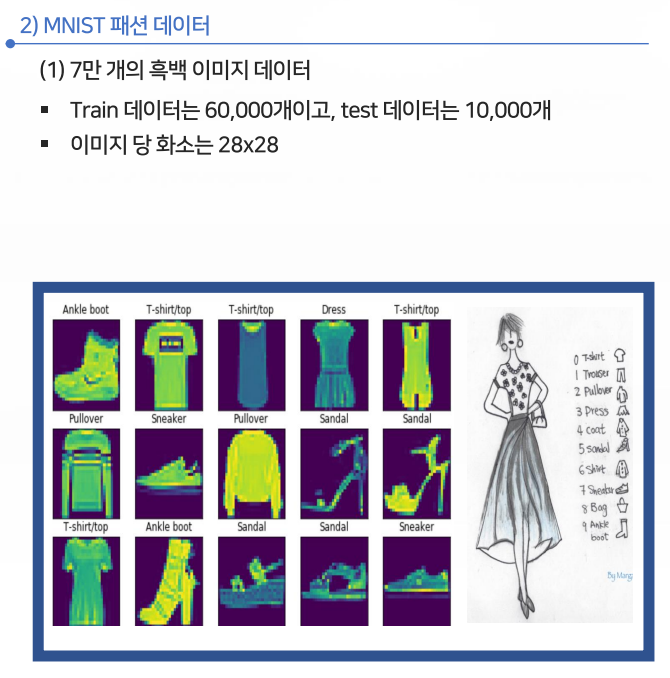

In [10]:
Image("img/day02_12.png", width=600)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPool2D


# 하이퍼 파라미터
MY_EPOCH = 3
MY_BATCH = 300

In [12]:
###### 데이터 준비 ######

# 데이터 파일 읽기
# 결과는 numpy n차원 행렬 형식
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

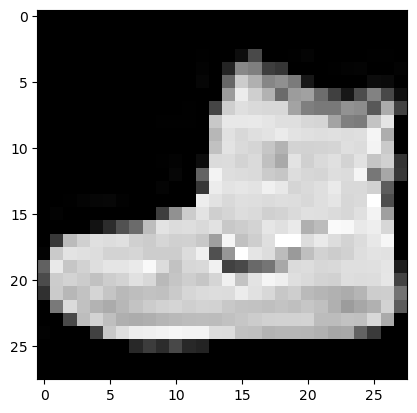

In [13]:
## https://keras.io/api/datasets/fashion_mnist/
# 샘플데이터 (28 * 28) : 0~255 구성
print (X_train[0])

## 이미지로 확인
plt.imshow(X_train[0], cmap="gray")
plt.show()

### MinMax 정규화

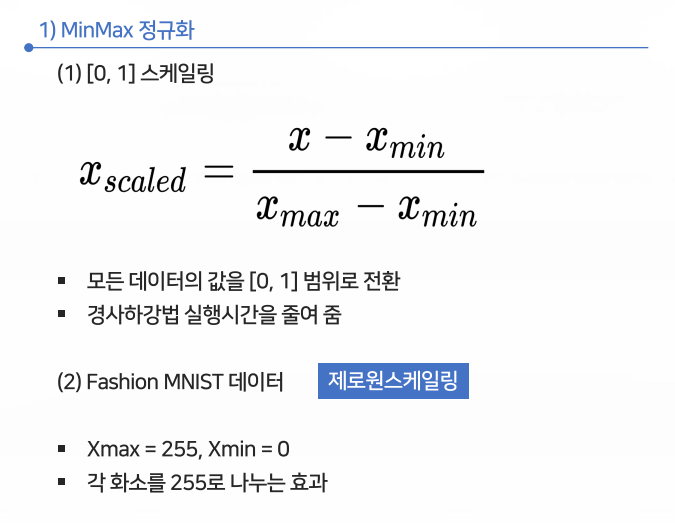

In [14]:
Image("img/day02_13.png", width=600)

In [15]:
# 입력 데이터 정규화 : MinMax

X_train = X_train / 255.0
X_test = X_test / 255.0

#### 입력 데이터가 3차원이면 안되고 4차원이어야 한다.

#### 60000 * 28 * 28 (3차원) * (채널)

#### 마지막에는 채널이 하나 더 들어가야한다.

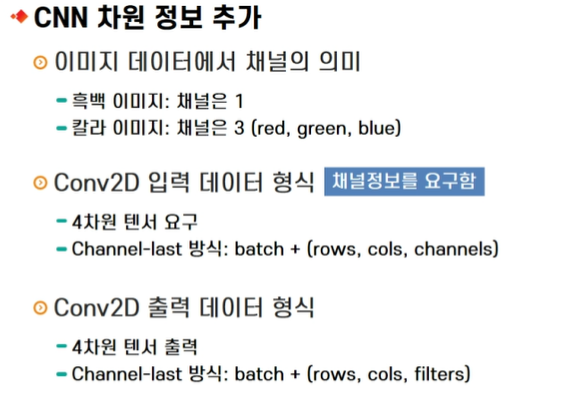

In [16]:
Image("img/day02_14.png", width=600)

### 채널 정보 추가

In [17]:
### 채널을 추가해서 4차원을 만드는 이유 : keras에서 4차원 정보를 요구
train = X_train.shape[0]

#(train, 28, 28, 1) 에서 1은 흑백
X_train = X_train.reshape(train, 28, 28, 1)

test = X_test.shape[0]

X_test = X_test.reshape(test, 28, 28, 1)


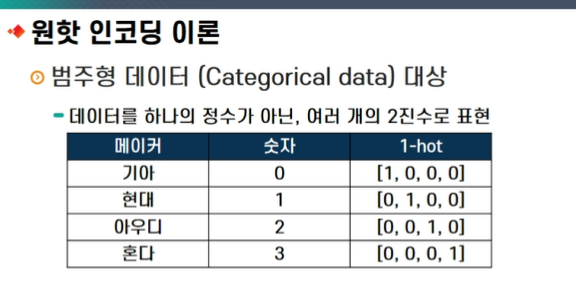

In [18]:
Image("img/day02_15.png", width=600)

In [19]:
## 출력 데이터 ( = 라벨 정보) 원핫 인코딩
# 0 - 9 사이 

print('전: ' , y_train[0])
y_train = to_categorical(y_train, 10)
print('후: ' , y_train[0])

y_test = to_categorical(y_test, 10)

전:  0
후:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


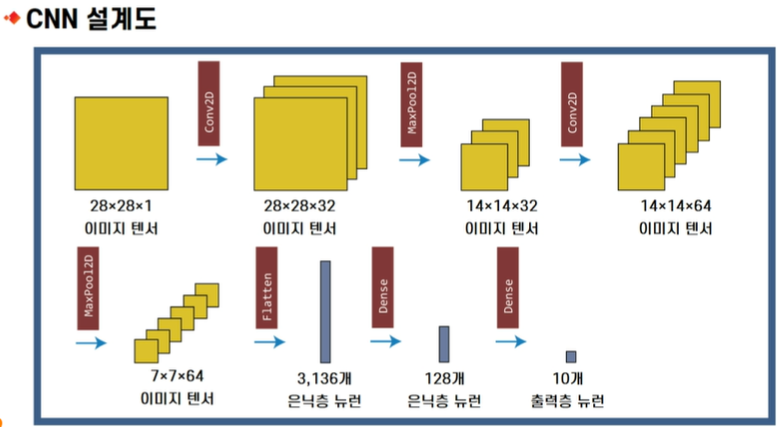

In [20]:
Image("img/day02_16.png", width=600)

### CNN 설계도

### 1. 입력층 (Input Layer)
- **크기**: 28x28x1 (1채널 그레이스케일 이미지)
- **설명**: 입력 데이터로 사용되는 이미지 텐서입니다. Fashion MNIST 데이터셋의 이미지 크기와 일치합니다.

> **이미지 텐서(일반적으로 3차원 배열)의 구성 요소** 
> - 높이(height): 이미지의 세로 방향 픽셀 수입니다.
> - 너비(width): 이미지의 가로 방향 픽셀 수입니다.
> - 채널(channel): 각 픽셀이 가지는 색상 정보를 나타내는 채널 수입니다.
> - 일반적으로 그레이스케일 이미지는 1채널(흑백), 컬러 이미지는 3채널(RGB)로 구성됩니다.

### 2. 첫 번째 합성곱 층 (Conv2D Layer)
- **필터 수**: 32개
- **필터 크기**: 3x3
- **출력 크기**: 28x28x32
- **설명**: 입력 이미지에 32개의 3x3 필터를 적용하여 32개의 특징 맵을 생성합니다. 패딩을 사용하여 출력 크기를 입력 크기와 동일하게 유지합니다.

### 3. 첫 번째 최대 풀링 층 (MaxPool2D Layer)
- **풀링 크기**: 2x2
> - 예) 최대 풀링 :  입력:[[1,3], [2,4]]  출력 : 4 (가장 큰 값을 선택)
- **출력 크기**: 14x14x32
- **설명**: 2x2 영역에서 최대값을 추출하여 출력 크기를 절반으로 줄입니다. 이는 주요 특징을 강조하고 계산량을 줄이는 데 도움이 됩니다.

> - 풀링(pooling)은 합성곱 신경망(CNN)에서 사용되는 중요한 연산
> - 특징 맵(feature map)의 크기를 줄이고 계산량을 감소시키며, 모델의 불변성과 일반화 능력을 높이기 위해 사용됩니다. 
> - 풀링 층은 다운샘플링(downsampling) 과정을 통해 입력 이미지나 특징 맵의 공간적 크기를 줄입니다.

### 4. 두 번째 합성곱 층 (Conv2D Layer)
- **필터 수**: 64개
- **필터 크기**: 3x3
- **출력 크기**: 14x14x64
- **설명**: 첫 번째 합성곱 층과 유사하게, 64개의 3x3 필터를 적용하여 더 복잡한 특징을 추출합니다.

### 5. 두 번째 최대 풀링 층 (MaxPool2D Layer)
- **풀링 크기**: 2x2
- **출력 크기**: 7x7x64
- **설명**: 2x2 풀링을 통해 출력 크기를 다시 절반으로 줄입니다.

### 6. 평탄화 층 (Flatten Layer)
- **출력 크기**: 3,136개 뉴런
- **설명**: 7x7x64 크기의 텐서를 1차원 벡터로 변환합니다. 이는 완전 연결 층에 입력으로 사용됩니다.

### 7. 첫 번째 완전 연결 층 (Dense Layer)
- **뉴런 수**: 128개
- **설명**: 평탄화된 입력을 받아 128개의 뉴런으로 구성된 완전 연결 층에 전달합니다. **활성화 함수로 ReLU**를 사용하여 비선형성을 부여합니다.

### 8. 출력층 (Output Layer)
- **뉴런 수**: 10개
- **설명**: 10개의 뉴런으로 구성된 출력층입니다. 각 뉴런은 10개의 클래스(Fashion MNIST 데이터셋의 클래스)에 대한 확률을 나타냅니다. **소프트맥스(Softmax) 활성화 함수**를 사용하여 각 클래스의 확률을 계산합니다.

### 전체 흐름 요약
1. **입력 이미지**: 28x28 크기의 그레이스케일 이미지.
2. **합성곱 층**: 특징 맵을 추출.
3. **풀링 층**: 특징 맵의 크기를 줄이고 주요 특징을 강조.
4. **평탄화 층**: 2D 텐서를 1D 벡터로 변환.
5. **완전 연결 층**: 분류를 위해 뉴런 연결.
6. **출력 층**: 각 클래스에 대한 확률 계산.

이 CNN 아키텍처는 이미지에서 중요한 특징을 추출하고, 이를 기반으로 이미지를 분류하는 데 사용됩니다. 각 단계는 이미지의 공간적 구조를 점진적으로 축소하면서 중요한 특징을 강조하여 최종적으로 클래스별 확률을 출력합니다.

In [23]:
####### 인공 신경망 구축 #######

# 모델 생성
model = Sequential()

In [24]:
# 입력 층 
model.add(InputLayer(shape=(28,28,1)))

In [26]:
# 첫 번쨰 합성 곱 층
model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=2))

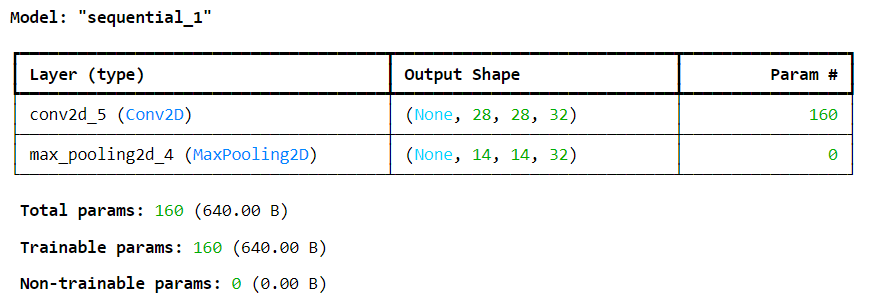

In [25]:
Image("img/day02_17.png", width=600)

In [27]:
# 두번째 합성 곱 층
model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=2))

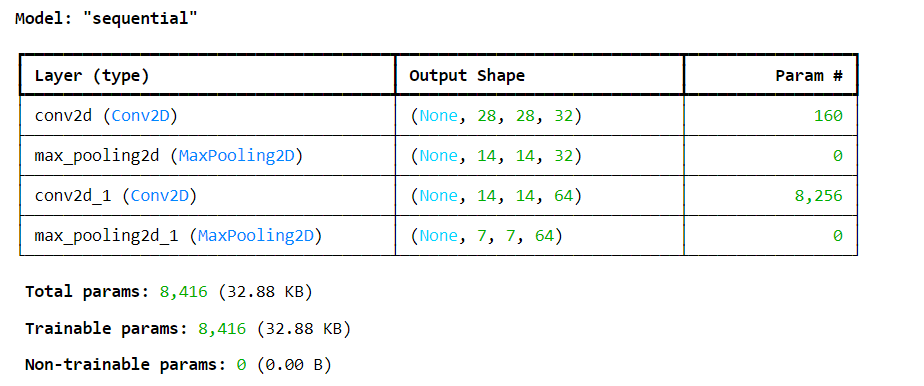

In [28]:
Image("img/day02_18.png", width=600)

In [29]:
# 평탄화 작업
model.add(Flatten())

## 완전 연결(Dense)
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))



In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,242 (1.57 MB)

 Trainable params: 411,242 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

### Compile(컴파일)

In [31]:
# 최적화 함수와 손실함수 지정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# 학습 시작
begin = time()
print("학습 시작")

# 하이퍼 파라미터
# MY_EPOCH = 3      (반복 횟수)
# MY_BATCH = 300    (6만개를 300개씩 학습한다.)

# 모델 학습
model.fit(X_train, y_train, epochs=MY_EPOCH, batch_size = MY_BATCH, verbose=1)
end = time()
print("총 학습시간  : {:.1f}초".format(end-begin))

학습 시작
Epoch 1/3
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - acc: 0.6983 - loss: 0.8913
Epoch 2/3
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - acc: 0.8693 - loss: 0.3700
Epoch 3/3
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - acc: 0.8857 - loss: 0.3213
총 학습시간  : 20.3초


In [33]:
########## 인공 신경망 평가 ##########


# CNN 평가
# `_` 손실값을 무시하고(반환된 값 중 첫 번째 값을 무시), `score`는 정확도값을 받는다. 
#  verbose=1 => 평가 과정에서 출력되는 로그의 상세도를 설정(0은 로그 출력 안함, 1은 진행바, 2각 에포크 에 대한 간단한 로그)
_, score = model.evaluate(X_test, y_test, verbose=1)

# F1 점수 : 정밀도 (Precision): 모델이 양성으로 예측한 것들 중 실제 양성인 비율
#           재현율 (Recall): 실제 양성 중에서 모델이 양성으로 정확히 예측한 비율
#           F1 점수: 정밀도와 재현율의 조화 평균

print('최종 정확도: {:.2f}%'.format(score * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8737 - loss: 0.3462
최종 정확도: 87.31%


### CNN 예측

In [34]:
# 10000개의 이미지를 하나하나 CNN에 넣으면서 하나의 그림이 10개의 소프트맥 활성화된 확률 계싼
pred = model.predict(X_test)

## numpy의 argmax를 활용하면
pred = np.argmax(pred, axis=1)
truth = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [35]:
#혼동행렬
print(confusion_matrix(truth, pred))

[[729   0  19  26   4   3 203   0  16   0]
 [  1 962   1  20   5   0   8   0   3   0]
 [  6   0 841   8  45   0  96   0   4   0]
 [ 12   4  13 875  24   0  65   0   7   0]
 [  0   1 108  23 709   0 156   0   3   0]
 [  0   0   0   0   0 960   0  33   1   6]
 [ 63   1  68  20  42   0 789   0  17   0]
 [  0   0   0   0   0   7   0 986   2   5]
 [  0   1   1   2   1   1   8   5 981   0]
 [  0   0   0   0   0   5   2  92   2 899]]


In [39]:
## F1-Score : 조화 평균 (두 개의 값이 가장 비슷할 때 가장 큰 값으로 나온다.)
f1 = f1_score(truth, pred, average='micro')

print("F1점수 : {:.3f}".format(f1))

F1점수 : 0.873


### 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

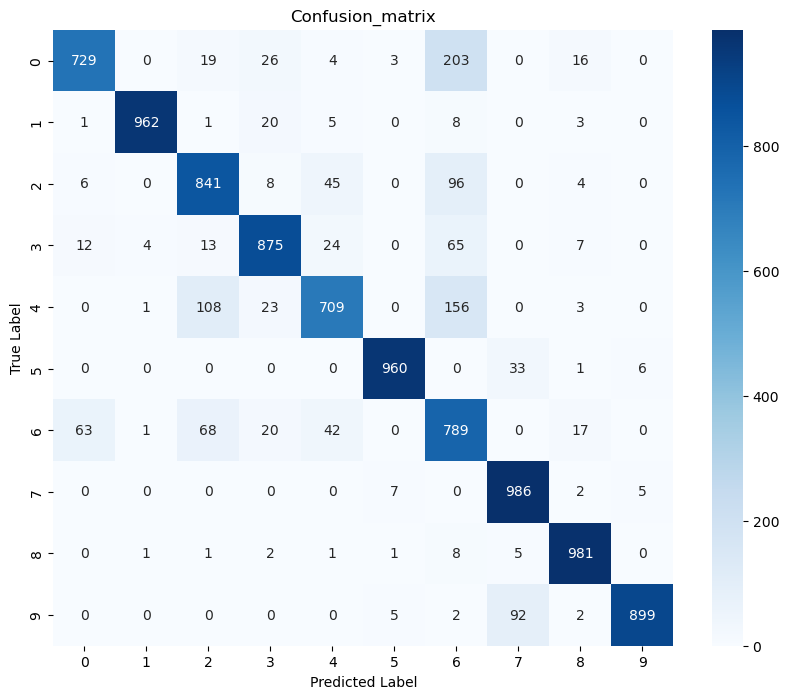

In [45]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(truth, pred), annot=True,fmt='d', cmap='Blues', xticklabels=np.unique(truth), yticklabels=np.unique(truth))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion_matrix')
plt.show